In [10]:
import pandas as pd

# Load the dataset
file_path = '/content/earthquake_data.csv'
earthquake_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
earthquake_data.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,22-11-2022 02:03,8,7,green,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,18-11-2022 13:37,4,4,green,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738,"Bengkulu, Indonesia",NaN,NaN
2,M 7.0 -,7.0,12-11-2022 07:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346,NaN,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,11-11-2022 10:48,5,5,green,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129,"Neiafu, Tonga",NaN,NaN
4,M 6.6 -,6.6,09-11-2022 10:14,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278,NaN,NaN,NaN


In [11]:
# Summery statistics:
# Display summary statistics
print(earthquake_data.describe())

# Display information about data types and missing values
print(earthquake_data.info())


        magnitude         cdi         mmi     tsunami          sig  \
count  782.000000  782.000000  782.000000  782.000000   782.000000   
mean     6.941125    4.333760    5.964194    0.388747   870.108696   
std      0.445514    3.169939    1.462724    0.487778   322.465367   
min      6.500000    0.000000    1.000000    0.000000   650.000000   
25%      6.600000    0.000000    5.000000    0.000000   691.000000   
50%      6.800000    5.000000    6.000000    0.000000   754.000000   
75%      7.100000    7.000000    7.000000    1.000000   909.750000   
max      9.100000    9.000000    9.000000    1.000000  2910.000000   

              nst        dmin         gap       depth    latitude   longitude  
count  782.000000  782.000000  782.000000  782.000000  782.000000  782.000000  
mean   230.250639    1.325757   25.038990   75.883199    3.538100   52.609199  
std    250.188177    2.218805   24.225067  137.277078   27.303429  117.898886  
min      0.000000    0.000000    0.000000    2.70

# Visualization:

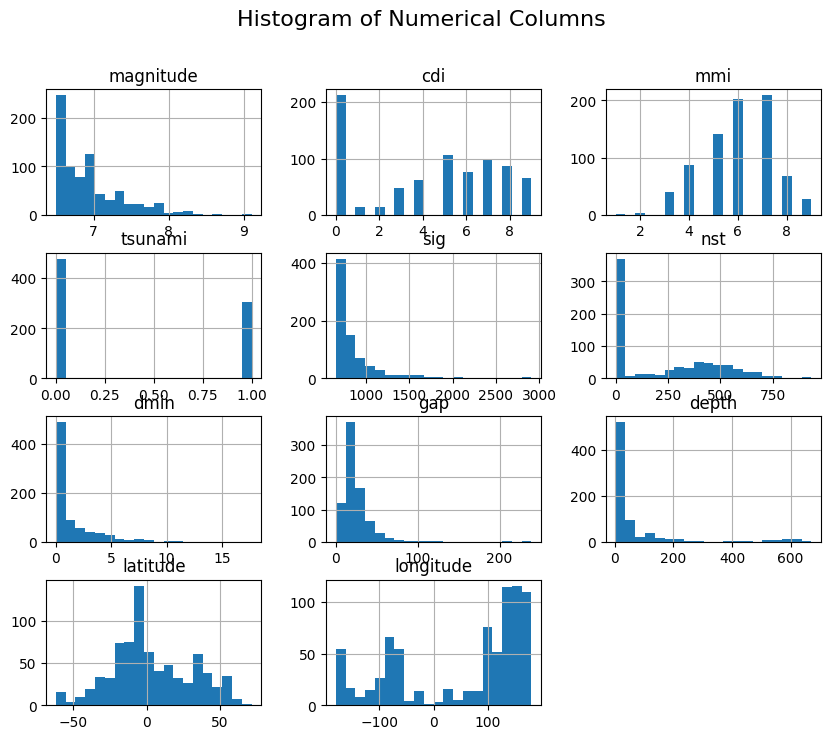

In [12]:
import matplotlib.pyplot as plt

# Histogram for all numeric columns
earthquake_data.hist(bins=20, figsize=(10, 8))
plt.suptitle('Histogram of Numerical Columns', fontsize=16)
plt.show()


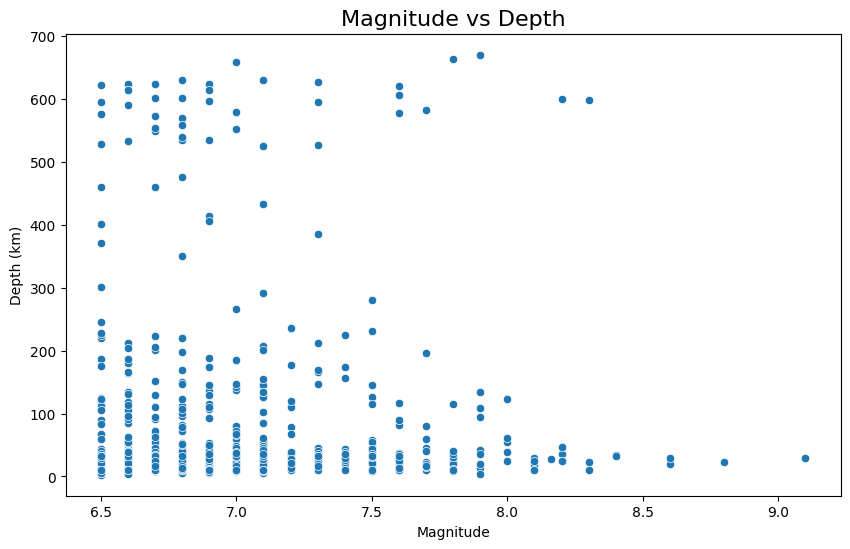

In [14]:
# scatter plot:
import seaborn as sns

# Example: Plotting the relationship between magnitude and depth
plt.figure(figsize=(10, 6))
sns.scatterplot(data=earthquake_data, x='magnitude', y='depth')
plt.title('Magnitude vs Depth', fontsize=16)
plt.xlabel('Magnitude')
plt.ylabel('Depth (km)')
plt.show()


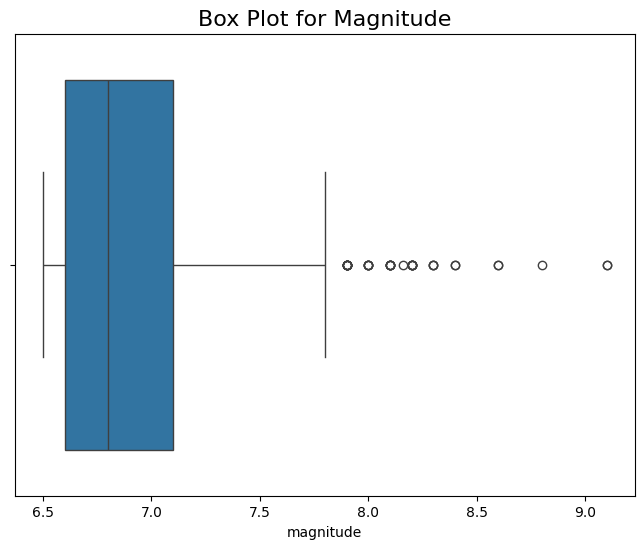

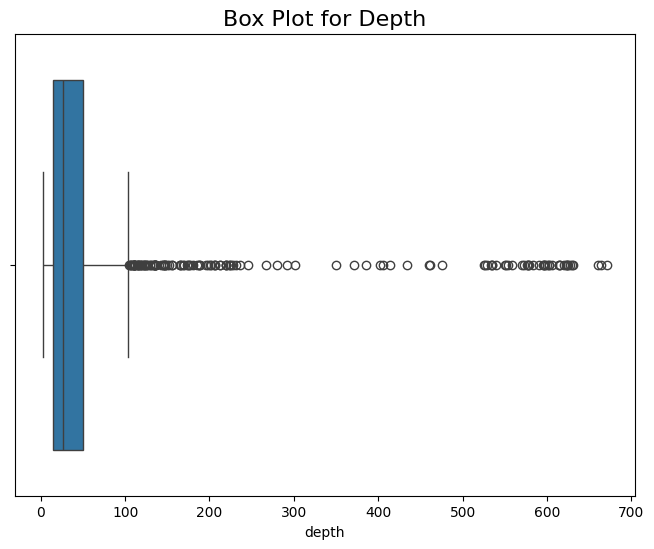

In [15]:
#box plot:
# Boxplot for magnitude
plt.figure(figsize=(8, 6))
sns.boxplot(data=earthquake_data, x='magnitude')
plt.title('Box Plot for Magnitude', fontsize=16)
plt.show()

# Boxplot for depth
plt.figure(figsize=(8, 6))
sns.boxplot(data=earthquake_data, x='depth')
plt.title('Box Plot for Depth', fontsize=16)
plt.show()


In [16]:
# handeling missing value:
# Check for missing values
print(earthquake_data.isnull().sum())

# Option 1: Fill missing values with the median (for numerical columns)
earthquake_data.fillna(earthquake_data.median(), inplace=True)

# Option 2: Drop rows with missing values (if any)
# earthquake_data.dropna(inplace=True)

# Verify if missing values are handled
print(earthquake_data.isnull().sum())


title          0
magnitude      0
date_time      0
cdi            0
mmi            0
alert        367
tsunami        0
sig            0
net            0
nst            0
dmin           0
gap            0
magType        0
depth          0
latitude       0
longitude      0
location       5
continent    576
country      298
dtype: int64


TypeError: Cannot convert [['M 7.0 - 18 km SW of Malango, Solomon Islands'
  'M 6.9 - 204 km SW of Bengkulu, Indonesia' 'M 7.0 - ' ...
  'M 7.1 - 16 km NE of Port-Olry, Vanuatu'
  'M 6.8 - Mindanao, Philippines'
  'M 7.5 - 21 km SE of Lukatan, Philippines']
 ['22-11-2022 02:03' '18-11-2022 13:37' '12-11-2022 07:09' ...
  '09-01-2001 16:49' '01-01-2001 08:54' '01-01-2001 06:57']
 ['green' 'green' 'green' ... nan nan nan]
 ...
 ['Malango, Solomon Islands' 'Bengkulu, Indonesia' nan ...
  'Port-Olry, Vanuatu' 'Mindanao, Philippines' 'Lukatan, Philippines']
 ['Oceania' nan 'Oceania' ... nan nan nan]
 ['Solomon Islands' nan 'Fiji' ... 'Vanuatu' nan 'Philippines']] to numeric

In [26]:

from sklearn.preprocessing import LabelEncoder

# Check if 'continent' column exists (you can replace 'continent' with any other categorical column)
if 'continent' in earthquake_data.columns:
    # Create an instance of LabelEncoder
    label_encoder = LabelEncoder()

    # Encoding the 'continent' column
    earthquake_data['continent'] = label_encoder.fit_transform(earthquake_data['continent'])

    # Display the encoded data
    print(earthquake_data['continent'].head())
else:
    print("Error: 'continent' column not found in the dataset.")



Error: 'continent' column not found in the dataset.


In [19]:
# One-hot encode categorical columns (if applicable)
earthquake_data = pd.get_dummies(earthquake_data, drop_first=True)

# Check the one-hot encoded columns
print(earthquake_data.head())


   magnitude  cdi  mmi  tsunami  sig  nst   dmin   gap    depth  latitude  \
0        7.0    8    7        1  768  117  0.509  17.0   14.000   -9.7963   
1        6.9    4    4        0  735   99  2.229  34.0   25.000   -4.9559   
2        7.0    3    3        1  755  147  3.125  18.0  579.000  -20.0508   
3        7.3    5    5        1  833  149  1.865  21.0   37.000  -19.2918   
4        6.6    0    2        1  670  131  4.998  27.0  624.464  -25.5948   

   ...  country_South Georgia and the South Sandwich Islands  country_Taiwan  \
0  ...                                              False              False   
1  ...                                              False              False   
2  ...                                              False              False   
3  ...                                              False              False   
4  ...                                              False              False   

   country_Tajikistan  country_Tanzania  country_Tonga  

In [21]:
# Standardize:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Example: Standardize the 'magnitude' and 'depth' columns
earthquake_data[['magnitude', 'depth']] = scaler.fit_transform(earthquake_data[['magnitude', 'depth']])

# Check the standardized values
print(earthquake_data[['magnitude', 'depth']].head())


   magnitude     depth
0   0.132235 -0.451079
1  -0.092369 -0.370898
2   0.132235  3.667319
3   0.806045 -0.283427
4  -0.766179  3.998715


In [22]:
#Normalize:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
min_max_scaler = MinMaxScaler()

# Example: Normalize the 'magnitude' and 'depth' columns
earthquake_data[['magnitude', 'depth']] = min_max_scaler.fit_transform(earthquake_data[['magnitude', 'depth']])

# Check the normalized values
print(earthquake_data[['magnitude', 'depth']].head())


   magnitude     depth
0   0.192308  0.016913
1   0.153846  0.033378
2   0.192308  0.862583
3   0.307692  0.051339
4   0.038462  0.930631


3. Model Implimentation:


In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
earthquake_data = pd.read_csv('/content/earthquake_data.csv')

# Drop irrelevant columns (title, date_time)
earthquake_data = earthquake_data.drop(columns=['title', 'date_time'])

# Check for missing values and drop rows with missing data
earthquake_data = earthquake_data.dropna()  # Or use .fillna() to fill missing values if necessary

# One-Hot Encoding for categorical variables
earthquake_data = pd.get_dummies(earthquake_data, drop_first=True)

# Features (X) and target variable (magnitude)
X = earthquake_data.drop(columns=['magnitude'])  # Features (excluding magnitude)
y = earthquake_data['magnitude']  # Target variable (magnitude)

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the regression models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test set

    # Print model performance metrics (Mean Squared Error)
    print(f"{name} Mean Squared Error: {mean_squared_error(y_test, y_pred)}")


Linear Regression Mean Squared Error: 0.29547096128156675
Decision Tree Regressor Mean Squared Error: 0.22310344827586207
Random Forest Regressor Mean Squared Error: 0.1406220344827588


In [51]:
# 3.2:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
earthquake_data = pd.read_csv('/content/earthquake_data.csv')

# Drop irrelevant columns (title, date_time)
earthquake_data = earthquake_data.drop(columns=['title', 'date_time'])

# Check for missing values and drop rows with missing data
earthquake_data = earthquake_data.dropna()  # Or use .fillna() to fill missing values if necessary

# One-Hot Encoding for categorical variables
earthquake_data = pd.get_dummies(earthquake_data, drop_first=True)

# Features (X) and target variable (magnitude)
X = earthquake_data.drop(columns=['magnitude'])  # Features (excluding magnitude)
y = earthquake_data['magnitude']  # Target variable (magnitude)

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shape of the training and testing sets
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (67, 136)
Testing set size: (29, 136)


# 3.3

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
earthquake_data = pd.read_csv('/content/earthquake_data.csv')

# Drop irrelevant columns (title, date_time)
earthquake_data = earthquake_data.drop(columns=['title', 'date_time'])

# Check for missing values and drop rows with missing data
earthquake_data = earthquake_data.dropna()  # Or use .fillna() to fill missing values if necessary

# One-Hot Encoding for categorical variables
earthquake_data = pd.get_dummies(earthquake_data, drop_first=True)

# Features (X) and target variable (magnitude)
X = earthquake_data.drop(columns=['magnitude'])  # Features (excluding magnitude)
y = earthquake_data['magnitude']  # Target variable (magnitude)

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the regression models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42)
}

# Train each model
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    print(f"{name} trained successfully!")

# Optionally, evaluate model performance
for name, model in models.items():
    y_pred = model.predict(X_test)  # Predict on test set
    mse = mean_squared_error(y_test, y_pred)  # Calculate Mean Squared Error
    print(f"{name} Mean Squared Error: {mse}")



Linear Regression trained successfully!
Decision Tree Regressor trained successfully!
Random Forest Regressor trained successfully!
Linear Regression Mean Squared Error: 0.29547096128156675
Decision Tree Regressor Mean Squared Error: 0.22310344827586207
Random Forest Regressor Mean Squared Error: 0.1406220344827588


# 4. Model evaluation

# 4.1

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
earthquake_data = pd.read_csv('/content/earthquake_data.csv')

# Drop irrelevant columns (title, date_time)
earthquake_data = earthquake_data.drop(columns=['title', 'date_time'])

# Check for missing values and drop rows with missing data
earthquake_data = earthquake_data.dropna()  # Or use .fillna() to fill missing values if necessary

# One-Hot Encoding for categorical variables
earthquake_data = pd.get_dummies(earthquake_data, drop_first=True)

# Features (X) and target variable (magnitude)
X = earthquake_data.drop(columns=['magnitude'])  # Features (excluding magnitude)
y = earthquake_data['magnitude']  # Target variable (magnitude)

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the regression models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate performance using MAE, MSE, and R-squared
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print the evaluation metrics
    print(f"\n{name} Evaluation:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R²): {r2}")



Linear Regression Evaluation:
Mean Absolute Error (MAE): 0.43321607882016905
Mean Squared Error (MSE): 0.29547096128156675
R-squared (R²): -1.491888070976712

Decision Tree Regressor Evaluation:
Mean Absolute Error (MAE): 0.3758620689655172
Mean Squared Error (MSE): 0.22310344827586207
R-squared (R²): -0.8815683914961898

Random Forest Regressor Evaluation:
Mean Absolute Error (MAE): 0.28968965517241413
Mean Squared Error (MSE): 0.1406220344827588
R-squared (R²): -0.18595197553149023


# 4.2


Linear Regression Evaluation:
Mean Absolute Error (MAE): 0.43321607882016905
Mean Squared Error (MSE): 0.29547096128156675
R-squared (R²): -1.491888070976712


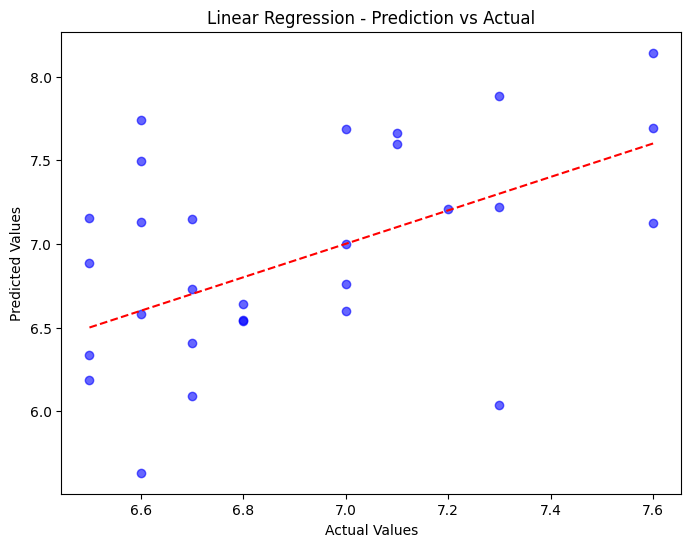

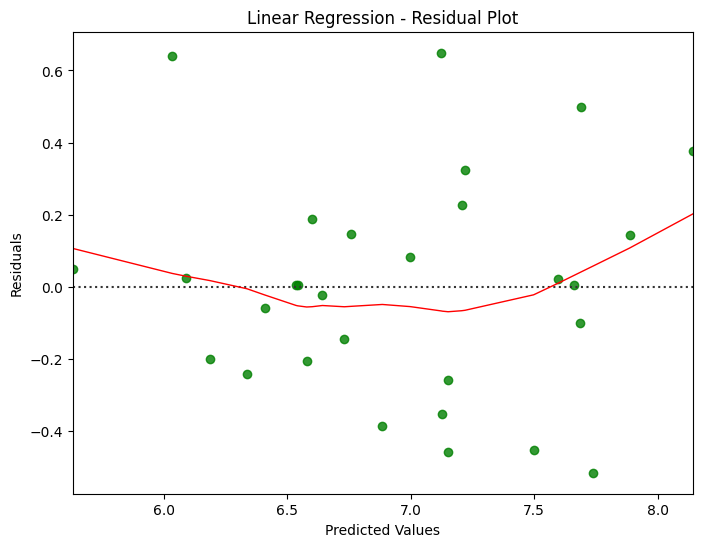

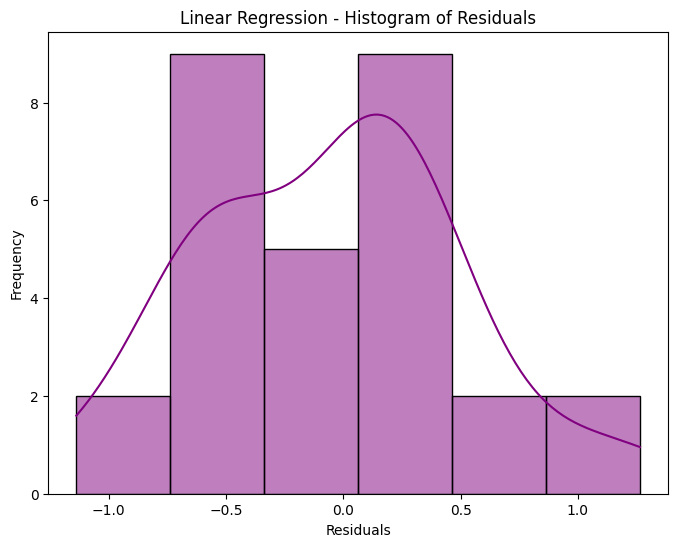


Decision Tree Regressor Evaluation:
Mean Absolute Error (MAE): 0.3758620689655172
Mean Squared Error (MSE): 0.22310344827586207
R-squared (R²): -0.8815683914961898


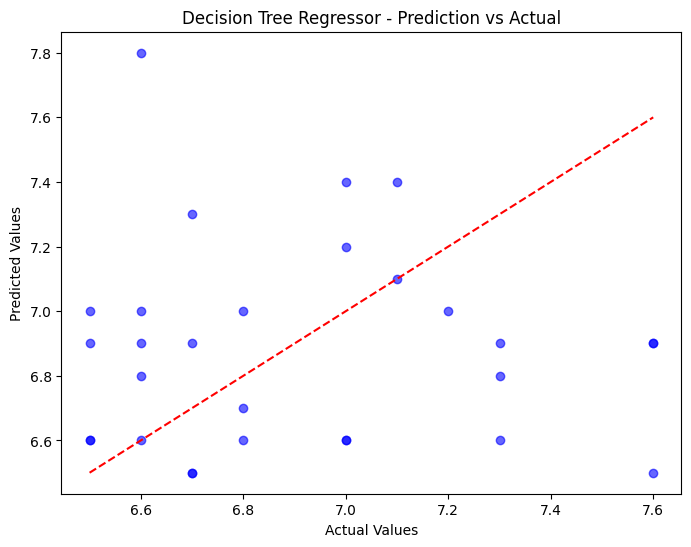

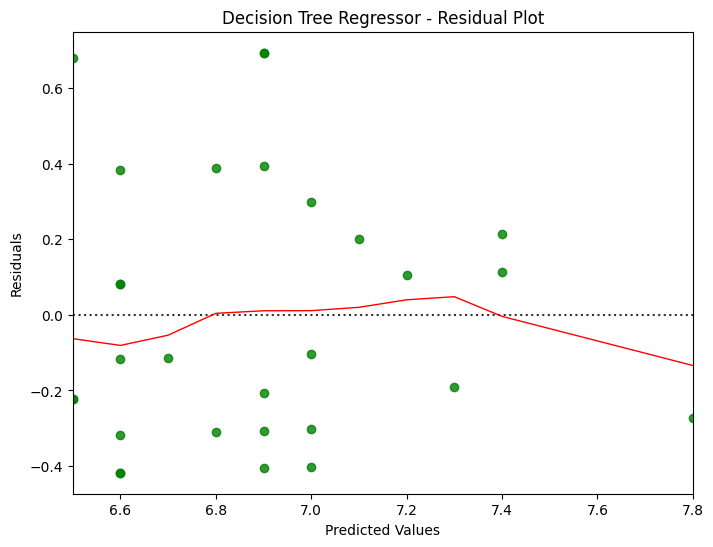

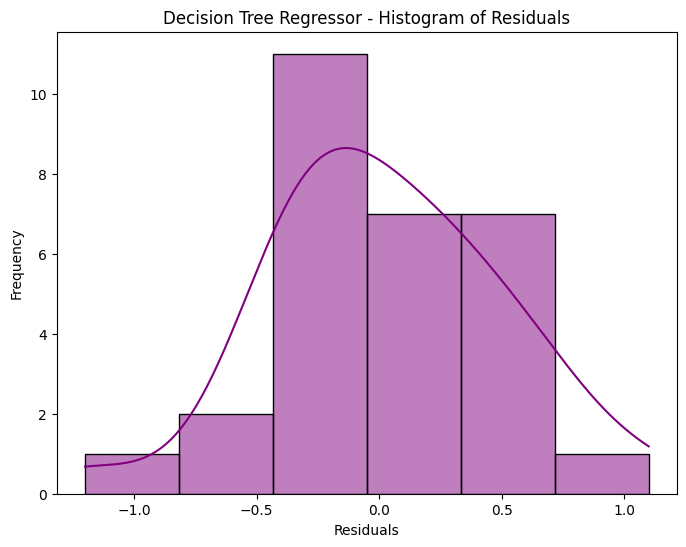


Random Forest Regressor Evaluation:
Mean Absolute Error (MAE): 0.28968965517241413
Mean Squared Error (MSE): 0.1406220344827588
R-squared (R²): -0.18595197553149023


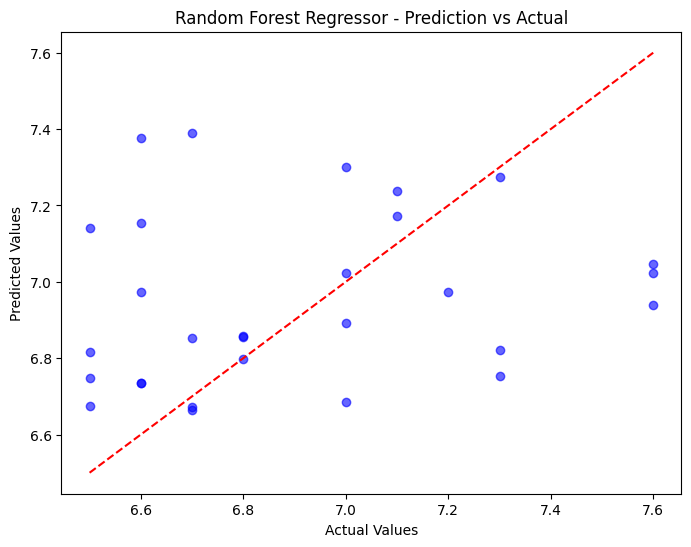

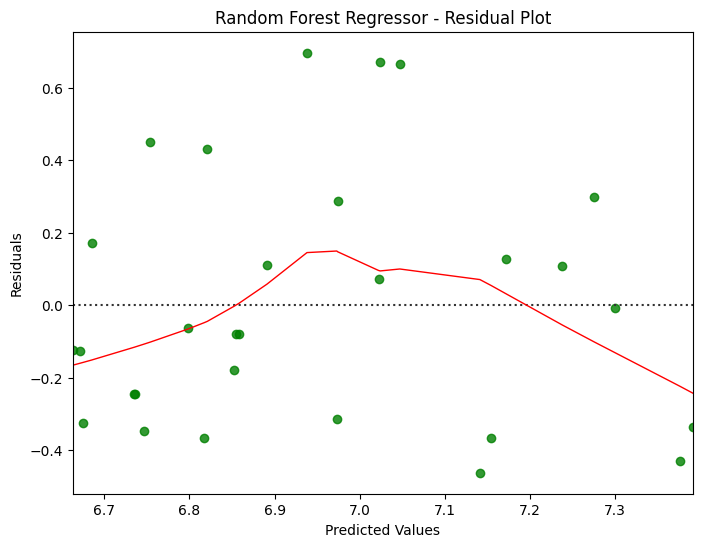

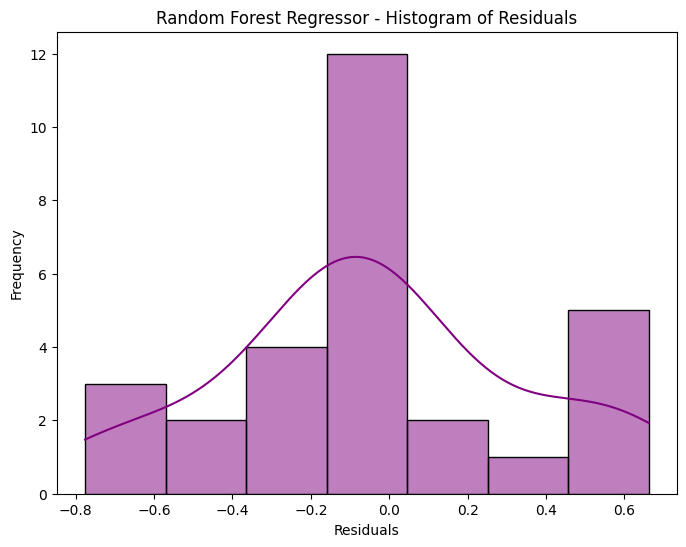

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate performance using MAE, MSE, and R-squared
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print the evaluation metrics
    print(f"\n{name} Evaluation:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R²): {r2}")

    # Visualization: Prediction vs Actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.6, color='b')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.title(f'{name} - Prediction vs Actual')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.show()

    # Visualization: Residual Plot
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    sns.residplot(x=y_pred, y=residuals, lowess=True, color='g', line_kws={'color': 'red', 'lw': 1})
    plt.title(f'{name} - Residual Plot')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()

    # Visualization: Histogram of Residuals
    plt.figure(figsize=(8, 6))
    sns.histplot(residuals, kde=True, color='purple')
    plt.title(f'{name} - Histogram of Residuals')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.show()


# 5

In [58]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Step 1: Load the dataset
df = pd.read_csv('/content/earthquake_data.csv')

# Step 2: Display the first few rows of the dataset to verify it's loaded
print(df.head())

# Step 3: Splitting dataset into features and target
X = df.drop(columns=['title', 'date_time', 'alert'])  # Remove non-numeric columns for simplicity
y = df['magnitude']  # Target column: 'magnitude'

# Step 4: Handle missing values in the dataset (if necessary)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)  # Impute missing values with the mean of each column

# Step 5: Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Step 6: Define parameter grids for models (for hyperparameter tuning)
param_grids = {
    'Linear Regression': {
        'fit_intercept': [True, False],
        'normalize': [True, False]
    },
    'Decision Tree Regressor': {
        'max_depth': [5, 10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Random Forest Regressor': {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }
}

# Step 7: Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42)
}

# Step 8: Perform Grid Search and evaluation for each model
for name, model in models.items():
    print(f"Performing Grid Search for {name}...")

    # Define GridSearchCV with cross-validation
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name],
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

    # Fit the grid search to the training data
    grid_search.fit(X_train, y_train)

    # Get the best parameters and best score from Grid Search
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Print the best parameters and their impact on performance
    print(f"Best Parameters for {name}: {best_params}")
    print(f"Best CV Score (MSE): {-best_score}")

    # Evaluate the best model on the test set
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    # Evaluate performance using MAE, MSE, and R-squared
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print evaluation metrics for the best model
    print(f"Evaluation of Best Model for {name}:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R²): {r2}")
    print("\n")


                                          title  magnitude         date_time  \
0  M 7.0 - 18 km SW of Malango, Solomon Islands        7.0  22-11-2022 02:03   
1      M 6.9 - 204 km SW of Bengkulu, Indonesia        6.9  18-11-2022 13:37   
2                                      M 7.0 -         7.0  12-11-2022 07:09   
3           M 7.3 - 205 km ESE of Neiafu, Tonga        7.3  11-11-2022 10:48   
4                                      M 6.6 -         6.6  09-11-2022 10:14   

   cdi  mmi  alert  tsunami  sig net  nst   dmin   gap magType    depth  \
0    8    7  green        1  768  us  117  0.509  17.0     mww   14.000   
1    4    4  green        0  735  us   99  2.229  34.0     mww   25.000   
2    3    3  green        1  755  us  147  3.125  18.0     mww  579.000   
3    5    5  green        1  833  us  149  1.865  21.0     mww   37.000   
4    0    2  green        1  670  us  131  4.998  27.0     mww  624.464   

   latitude  longitude                  location continent          

ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'us'